# Risk Analysis

In [1]:
#Importing the Libraries that will be required throughout the notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Pyton,PPt nd Readme.md

In [2]:
# Creating a dataframe for the loan.csv file which in this case could be considered the only datasource
df_loan=pd.read_csv('C:/Users/abhij/Desktop/loan.csv',low_memory=False)
#data_dictonary=pd.read_excel('C:/Users/abhij/Downloads/Data_Dictionary.xlsx')

df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Seperating the data into 3 seperate data frames
 1. People who have Fully paid the loans
 2. People who are still paying the loan 
 3. people who have Charged off (i.e. Defaulted)

In [3]:
df_fullypaid=df_loan[(df_loan['loan_status']=='Fully Paid')]
df_default=df_loan[(df_loan['loan_status']=='Charged Off')]

C:\Users\abhij\AppData\Local\Temp/ipykernel_15592/1569356627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  verified=df_fullypaid[(df_loan['verification_status']=='Verified')| (df_loan['verification_status']=='Source Verified')].count()
C:\Users\abhij\AppData\Local\Temp/ipykernel_15592/1569356627.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_verified=df_fullypaid[(df_loan['verification_status']=='Not Verified')].count()


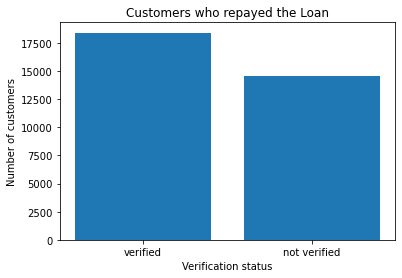

C:\Users\abhij\AppData\Local\Temp/ipykernel_15592/1569356627.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  verified=df_default[(df_loan['verification_status']=='Verified')| (df_loan['verification_status']=='Source Verified')].count()
C:\Users\abhij\AppData\Local\Temp/ipykernel_15592/1569356627.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_verified=df_default[(df_loan['verification_status']=='Not Verified')].count()


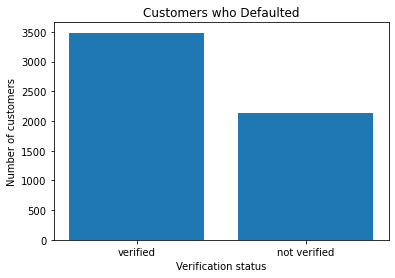

In [4]:
#checking the verification status for the people who defaulted vs the people who paid
verified=df_fullypaid[(df_loan['verification_status']=='Verified')| (df_loan['verification_status']=='Source Verified')].count()
not_verified=df_fullypaid[(df_loan['verification_status']=='Not Verified')].count()
x=['verified','not verified']
y=[verified['id'], not_verified['id']]

plt.bar(x, y)
plt.title("Customers who repayed the Loan")
plt.xlabel("Verification status")
plt.ylabel("Number of customers")
plt.show()

verified=df_default[(df_loan['verification_status']=='Verified')| (df_loan['verification_status']=='Source Verified')].count()
not_verified=df_default[(df_loan['verification_status']=='Not Verified')].count()
x=['verified','not verified']
y=[verified['id'], not_verified['id']]

plt.bar(x, y)
plt.title("Customers who Defaulted")
plt.xlabel("Verification status")
plt.ylabel("Number of customers")
plt.show()

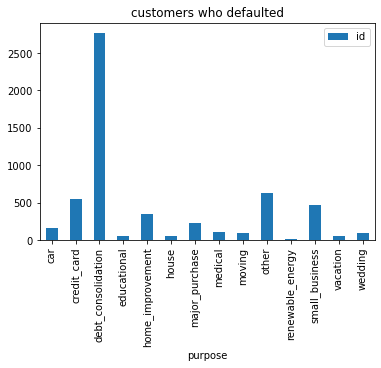

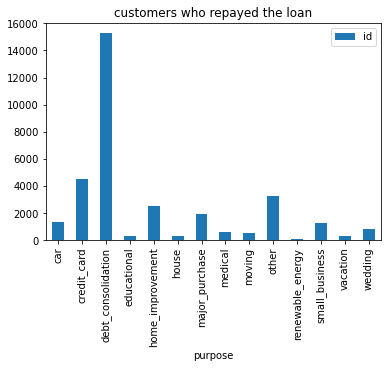

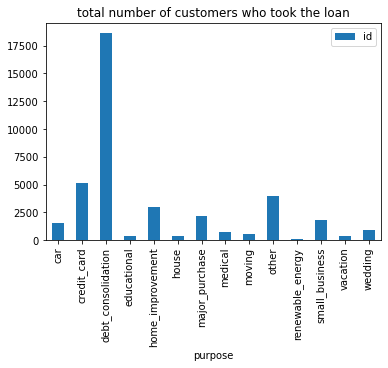

In [15]:
# Comparasion of purpose of Loan to see how many people have defaulted and what was there loan purpose
purpose_paid=df_fullypaid.groupby('purpose').count()
purpose_default=df_default.groupby('purpose').count()
purpose_total=df_loan.groupby('purpose').count()

x=purpose_default.index
y=purpose_default[['id']]

y.plot(kind='bar',title='customers who defaulted')
plt.show()

x=purpose_paid.index
y=purpose_paid[['id']]

y.plot(kind='bar',title='customers who repayed the loan')
plt.show()


x=purpose_total.index
y=purpose_total[['id']]

y.plot(kind='bar',title='total number of customers who took the loan')
plt.show()

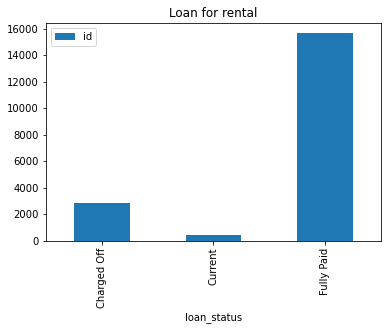

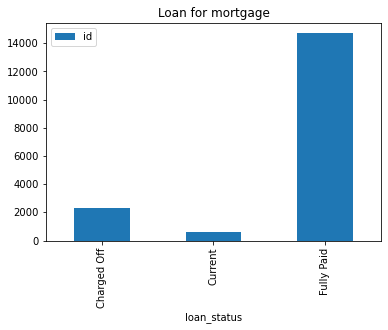

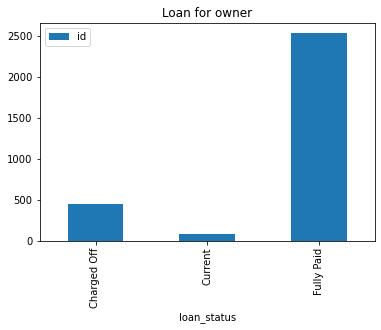

In [6]:
rent=df_loan[(df_loan['home_ownership']=='RENT')]
mortgage=df_loan[(df_loan['home_ownership']=='MORTGAGE')]
owned=df_loan[(df_loan['home_ownership']=='OWN')]

rented_stats=rent.groupby('loan_status').count()
plot_area= rented_stats[["id"]]
plot_area.plot(kind="bar", title="Loan for rental")
plt.show()


mortgage_stats=mortgage.groupby('loan_status').count()
plot_area= mortgage_stats[["id"]]
plot_area.plot(kind="bar", title="Loan for mortgage")
plt.show()

owned_stats=owned.groupby('loan_status').count()
plot_area= owned_stats[["id"]]
plot_area.plot(kind="bar", title="Loan for owner")
plt.show()


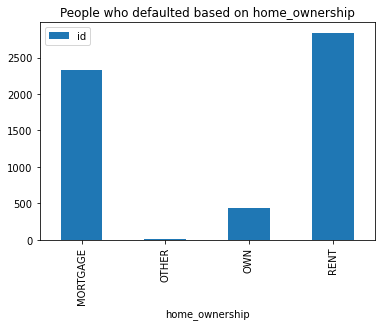

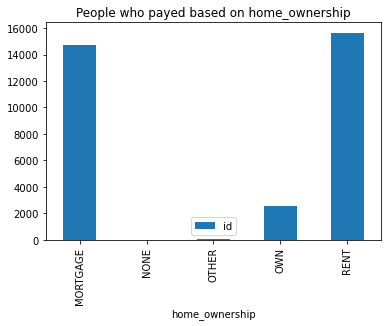

In [7]:
home_ownership_defaulters=df_default.groupby('home_ownership').count()
home_ownership_payers=df_fullypaid.groupby('home_ownership').count()

plot_area=home_ownership_defaulters[['id']]
plot_area.plot(kind='bar', title='People who defaulted based on home_ownership')
plt.show()

plot_area=home_ownership_payers[['id']]
plot_area.plot(kind='bar', title='People who payed based on home_ownership')
plt.show()

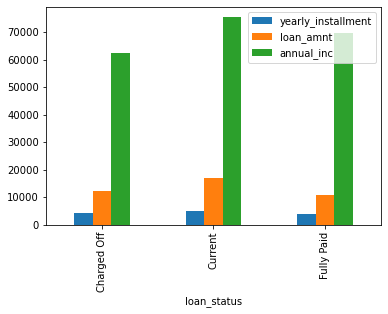

In [16]:
# creating a new column for calculating yearly installment of a loan and compare it with yearly income of a person 
df_loan['yearly_installment']= df_loan['installment']*12

Loan_status=df_loan.groupby('loan_status').mean()
Loan_status[['yearly_installment','loan_amnt','annual_inc']].plot(kind='bar')
plt.show()

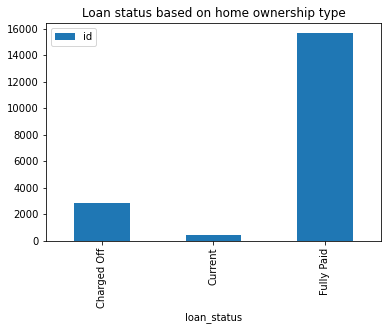

TypeError: 'method' object is not subscriptable